# SVM (linear kernel)

- Loss function: hinge loss
- Optimization algorithm: stochastic gradient descent
- Demo dataset: breast_cancer from sklearn.datasets

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import normalize
%matplotlib inline

class SVM_Classifier():
    # This class has two main methods: fit() and predict()
    
    def __init__(self):
        self.W = None
        self.scaling = None
    
    def hinge_loss(self, y_real, X, W, lmbd): 
        # loss function
        m = X.shape[0]
        n = X.shape[1]
        
        h = X.dot(W)

        hloss_map = map(lambda x: 0. if x>=1 else 1.-x, y_real*h)
        hloss_total = np.sum(hloss_map) + lmbd * np.sum(map(lambda x: x**2, W)) / n
        
        return hloss_total
    
    def scale(self, X):
        return normalize(X)
    
    def fit(self, X, y, alpha=0.005, lmbd=0.1, nsteps=3000, random_state=10, scaling=False,
            dynamic_lmbd=True, random_init=False):
        ##############################################
        # train a model by using given data X and y  #
        ##############################################
        # alpha - learning rate
        # lmbd - regularization coefficient
        # nsteps - number of iterations (epochs)
        # random_state - for random weight initialization
        # scaling - if True then normalize X
        # dynamic_lmbd - change regularization coefficient while train a model
        # random_init if True then use random weight initialization
        
        np.random.seed(random_state)
        
        if scaling:
            X = self.scale(X)
            self.scaling = True
            
        if random_init:
            self.W = np.random.rand(X.shape[1])
        else:
            self.W = np.zeros(X.shape[1])
        
        errors = []
        
        for i in range(1, nsteps+1):
            
            if dynamic_lmbd:
                lmbd = 1. / i

            # make a gradient-descent step
            # update weights

            for j in range(y.shape[0]):
                if (y[j]*np.dot(X[j], self.W)) < 1:
                    self.W = self.W - alpha*(2. * lmbd * self.W - y[j] * X[j])
                else:
                    self.W = self.W - alpha*(2. * lmbd * self.W)

            # J = let's compute cost function
            J = self.hinge_loss(y, X, self.W, lmbd)
            errors.append(J)
       
        return self.W, errors
    
    def predict(self, X):
        if self.scaling:
            return np.dot(self.scale(X), self.W)
        else:
            return np.dot(X, self.W)

# Let's build and test SVM Classifier

In [362]:
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

data = load_breast_cancer()
X = data['data']
y = data['target']
y[y==0] = -1

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build a model
svm = SVM_Classifier()
W, errors = svm.fit(X_train, y_train, alpha=0.01, nsteps=200)

# Test
y_pred = svm.predict(X_test)
y_pred[y_pred >= 0] = 1
y_pred[y_pred < 0] = 0
y_test[y_test == -1] = 0

print 'F1:\t\t', f1_score(y_test, y_pred)
print 'RECALL:\t\t', recall_score(y_test, y_pred)
print 'PRECISION:\t', precision_score(y_test, y_pred)

F1:		0.960698689956
RECALL:		0.982142857143
PRECISION:	0.940170940171


# How fast error is decreasing?

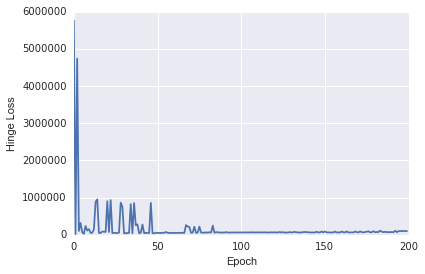

In [363]:
plt.plot([x for x in range(len(errors))], errors)
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')

# How many False Negatives and False Positives?

In [379]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print "FP:", fp
print "FN:", fn
print "TP:", tp
print "TN:", tn

FP: 7
FN: 2
TP: 110
TN: 52


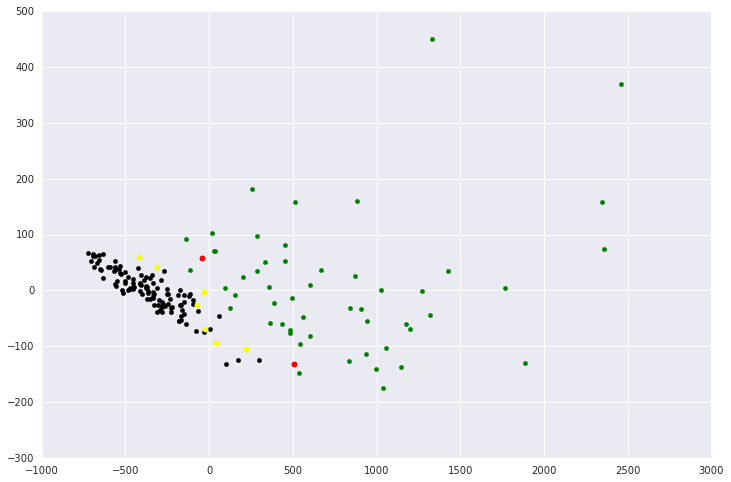

In [366]:
from sklearn.decomposition import PCA

pca = PCA(2)
x = pca.fit_transform(X_test)
class_0, class_1, fn, fp = [], [], [], []

for j in range(len(y_test)):
    
    if y_test[j] == 1:
        class_1.append(x[j])
        if y_pred[j] != 1:
            fn.append(x[j])
    else:
        class_0.append(x[j])
        if y_pred[j] == 1:
            fp.append(x[j])

class_0 = np.array(class_0)
class_1 = np.array(class_1)
fn = np.array(fn)
fp = np.array(fp)

plt.figure(figsize=(12,8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='green')
plt.scatter(class_1[:, 0], class_1[:, 1], color='black')
plt.scatter(fn[:, 0], fn[:, 1], color='red', s=30)
plt.scatter(fp[:, 0], fp[:, 1], color='yellow', s=30)

- Red: False Negatives
- Yellow: False Positives
- Black: positives
- Green: negatives